<a href="https://colab.research.google.com/github/MayaJambalaya/ClothingReviewDataKaggle/blob/main/Predicting%20CPU%20Performance%20With%20Linear%20Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Charles Wallis
#Maya Seale
#CS 4372
#Assignment 1

In [1]:
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor # Scikit Learn - Stochastic Gradient Descent
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings("ignore")  

In [2]:
bComputerHardware = True

In [3]:
# https://www.24tutorials.com/machine-learning/multivariate-linear-regression/
# web site shows method using another library: linear_model.LinearRegression()
if(bComputerHardware):    
    import pandas as pd
    url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/cpu-performance/machine.data'
    df = pd.read_csv(url, header=None)
    df.columns = ["vendor name", "Model Name", "MYCT", "MMIN", "MMAX", "CACH", "CHMIN", "CHMAX", "PRP", "ERP"]

    s="""
     Attribute Information:
     1. vendor name: 30
     2. Model Name: unique symbols
     3. MYCT: machine cycle time in nanoseconds (integer)
     4. MMIN: minimum main memory in kilobytes (integer)
     5. MMAX: maximum main memory in kilobytes (integer)
     6. CACH: cache memory in kilobytes (integer)
     7. CHMIN: minimum channels in units (integer)
     8. CHMAX: maximum channels in units (integer)
     9. PRP: published relative performance (integer)
    10. ERP: estimated relative performance from the original article (integer)
    """
    # Select the predictor and target variables
    df.info
    categorical_ = df.iloc[:,:2] # vendor, name
    
    numerical_   = df.iloc[:,2:] # numbers
    slim = df["MYCT","MMIN", "MMAX","CHMAX", "PRP"]

    x = numerical_.iloc[:,:-1] # all \erp
    y = numerical_.iloc[:,-1] #erp
    


    


KeyError: ignored

In [ ]:


if(bComputerHardware):    
    print(df.to_string())

In [ ]:
print(["lengths of x, y",len(x),len(y)])

In [ ]:
if(True):
    # improve the model accuracy we'll scale both x and y data then, split them into train and test parts. 
    # Here, we'll extract 15 percent of the samples as test data.

    # https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html
    #  https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-scaler
    #  Standardize a dataset along any axis.
    #  Center to the mean and component wise scale to unit variance.
    #   transform the data to center it by removing the mean value of each feature, 
    #   then scale it by dividing non-constant features by their standard deviation.
    x = scale(x) # , axis=0, with_mean=True, with_std=True, copy=True [defaults]
    y = scale(y) # , axis=0, with_mean=True, with_std=True, copy=True [defaults]
    # https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
    #  Split arrays or matrices into random train and test subsets.
    xtrain, xtest, ytrain, ytest=train_test_split(x, y, test_size=0.15)
    # test_size: If float, should be between 0.0 and 1.0 and represent the proportion of the dataset to include in the test split.
    # If int, represents the absolute number of test samples. 
    # If None, the value is set to the complement of the train size. If train_size is also None, it will be set to 0.25.

    

In [ ]:
print(["lengths of xtrain, xtest, ytrain, ytest",len(xtrain),len(xtest),len(ytrain),len(ytest)])

['lengths of xtrain, xtest, ytrain, ytest', 177, 32, 177, 32]


In [ ]:
def callSGDRegressor(xtrain, xtest, ytrain, ytest, loss = 'squared_loss', penalty = 'l2', alpha = 0.0001, l1_ratio = 0.15, fit_intercept = True, 
                     max_iter = 1000, tol = 1e-3, shuffle = True, verbose = 0, epsilon = 0.1, random_state = None, 
                     learning_rate = 'invscaling', eta0 = 0.01, power_t = 0.25, early_stopping = False, 
                     validation_fraction = 0.1, n_iter_no_change = 5, warm_start = False, average = False,
                    bShow = False):
    # https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html
    #Next, we'll define the regressor model by using the SGDRegressor class. 
    #Here, we can use default parameters of the SGDRegressor class.
    sgdr = SGDRegressor(
     loss = loss, # The loss function to be used. The possible values are ‘squared_error’, ‘huber’, ‘epsilon_insensitive’, or ‘squared_epsilon_insensitive’
     penalty = penalty, # The penalty (aka regularization term) to be used. Defaults to ‘l2’ which is the standard regularizer for linear SVM models. ‘l1’ and ‘elasticnet’ might bring sparsity to the model (feature selection) not achievable with ‘l2’.
     alpha = alpha, # Constant that multiplies the regularization term. The higher the value, the stronger the regularization. Also used to compute the learning rate when set to learning_rate is set to ‘optimal’.
     l1_ratio = l1_ratio, # The Elastic Net mixing parameter, with 0 <= l1_ratio <= 1. l1_ratio=0 corresponds to L2 penalty, l1_ratio=1 to L1. Only used if penalty is ‘elasticnet’.
     fit_intercept = fit_intercept, # Whether the intercept should be estimated or not. If False, the data is assumed to be already centered.
     max_iter = max_iter, # The maximum number of passes over the training data (aka epochs). It only impacts the behavior in the fit method, and not the partial_fit method.
     tol = tol, # The stopping criterion. If it is not None, training will stop when (loss > best_loss - tol) for n_iter_no_change consecutive epochs. Convergence is checked against the training loss or the validation loss depending on the early_stopping parameter.
     shuffle = shuffle, # Whether or not the training data should be shuffled after each epoch.
     verbose = verbose, # The verbosity level.
     epsilon = epsilon, # Epsilon in the epsilon-insensitive loss functions; only if loss is ‘huber’, ‘epsilon_insensitive’, or ‘squared_epsilon_insensitive’. For ‘huber’, determines the threshold at which it becomes less important to get the prediction exactly right. For epsilon-insensitive, any differences between the current prediction and the correct label are ignored if they are less than this threshold.
     random_state = random_state, # Used for shuffling the data, when shuffle is set to True. Pass an int for reproducible output across multiple function calls. See Glossary.
     learning_rate = learning_rate, # The learning rate schedule:
     eta0 = eta0, # The initial learning rate for the ‘constant’, ‘invscaling’ or ‘adaptive’ schedules. The default value is 0.01.
     power_t = power_t, # The exponent for inverse scaling learning rate.
     early_stopping = early_stopping, # Whether to use early stopping to terminate training when validation score is not improving. If set to True, it will automatically set aside a fraction of training data as validation and terminate training when validation score returned by the score method is not improving by at least tol for n_iter_no_change consecutive epochs.
     validation_fraction = validation_fraction, # The proportion of training data to set aside as validation set for early stopping. Must be between 0 and 1. Only used if early_stopping is True.
     n_iter_no_change = n_iter_no_change, # Number of iterations with no improvement to wait before stopping fitting. Convergence is checked against the training loss or the validation loss depending on the early_stopping parameter.
     warm_start = warm_start, # When set to True, reuse the solution of the previous call to fit as initialization, otherwise, just erase the previous solution. See the Glossary.
     average = average #When set to True, computes the averaged SGD weights across all updates and stores the result in the coef_ attribute. If set to an int greater than 1, averaging will begin once the total number of samples seen reaches average. So average=10 will begin averaging after seeing 10 samples.
    )
    if(bShow):
        print(sgdr)

    # https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html#sklearn.linear_model.SGDRegressor.fit
    # Then, we'll fit the model on train data and check the model accuracy score.
    sgdr.fit(xtrain, ytrain)               # Fit linear model with Stochastic Gradient Descent
    
    if(bShow):
        # output: Fitted SGDRegressor estimator.
        print([sgdr.coef_             ,"Weights assigned to the features."])
        print([sgdr.intercept_        ,"The intercept term."])
        print([sgdr.n_iter_             ,"The actual number of iterations before reaching the stopping criterion."])
        print([sgdr.t_                  ,"Number of weight updates performed during training. Same as (n_iter_ * n_samples)."])
        print([sgdr.n_features_in_      ,"Number of features seen during fit."])
        #print([sgdr.feature_names_in_ ,"Names of features seen during fit. Defined only when X has feature names that are all strings."])

    score = sgdr.score(xtrain, ytrain)     # coefficient of determination of the prediction.
    
    if(bShow):
        print("")
        print("R-squared:", score)

    # https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html
    #  https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation
    # Learning the parameters of a prediction function and testing it on the same data is a methodological mistake: 
    #  a model that would just repeat the labels of the samples that it has just seen would have a perfect score but 
    #  would fail to predict anything useful on yet-unseen data. This situation is called overfitting. To avoid it, 
    #  it is common practice when performing a (supervised) machine learning experiment to hold out part of the available 
    #  data as a test set X_test, y_test.
    # cv, here: int, to specify the number of folds in a (Stratified)KFold
    # apply a cross-validation method to the model and check the training accuracy. 
    cv_score = cross_val_score(sgdr, x, y, cv = 10)
    if(bShow):
        print("CV mean score: ", cv_score.mean()) #0.999999433353285...

    #predict the test data by using the trained model. We can check the accuracy of predicted data by using MSE and RMSE metrics.
    ypred = sgdr.predict(xtest)            # Predict using the linear model
    mse = mean_squared_error(ytest, ypred)
    
    if(bShow):
        print("MSE: ", mse)
        print("RMSE: ", mse**(1/2.0)) 
    return sgdr, score, cv_score.mean(), mse, ypred

In [ ]:
loss = 'squared_loss' # ‘squared_error’, ‘huber’, ‘epsilon_insensitive’, or ‘squared_epsilon_insensitive’
penalty = 'l2'
alpha = 0.0001  
l1_ratio = 0.15  
fit_intercept = True
max_iter = 1000
tol = 1e-3
shuffle = True
verbose = 0
epsilon = 0.1
random_state = None
learning_rate = 'invscaling' # constant, optimal, invscaling, adaptive  
eta0 = 0.01
power_t = 0.25
early_stopping = False
validation_fraction = 0.1
n_iter_no_change = 5
warm_start = False
average = False
#
#alpha, l1_ratio,  epsilon, max_iter, eta0, power_t, validation_fraction = [1.02132836e-04, 1.49983879e-01, 1.02328673e-01, 1.01034951e+03, 1.02628545e-02, 2.33399518e-01, 1.03040763e-01]
#alpha, l1_ratio,  epsilon, max_iter, eta0, power_t, validation_fraction = [9.73415872e-05, 1.50376657e-01, 1.04955283e-01, 1.02562206e+03, 1.11264952e-02, 2.09379481e-01, 1.06404516e-01]
#alpha, l1_ratio,  epsilon, max_iter, eta0, power_t, validation_fraction = [9.89090456e-05, 1.52079071e-01, 1.06586961e-01, 1.03938599e+03, 1.12852150e-02, 2.00775573e-01, 1.07030400e-01]
#alpha, l1_ratio,  epsilon, max_iter, eta0, power_t, validation_fraction = [9.97190285e-05, 1.50439861e-01, 1.04882994e-01, 1.02577353e+03, 1.11330414e-02, 2.09474277e-01, 1.08973794e-01]
#alpha, l1_ratio,  epsilon, max_iter, eta0, power_t, validation_fraction, tol = [1.00905194e-04, 1.50971014e-01, 1.06622600e-01, 1.02076055e+03, 1.11363027e-02, 2.06885446e-01, 1.06979654e-01, 1.00852787e-03]
#alpha, l1_ratio,  epsilon, max_iter, eta0, power_t, validation_fraction, tol = [1.01600282e-04, 1.51316511e-01, 1.04955283e-01, 1.02562206e+03, 1.11264952e-02, 2.09379481e-01, 1.06404516e-01, 1.00000000e-03]
#learning_rate = 'optimal'
#converged:
#alpha, l1_ratio,  epsilon, max_iter, eta0, power_t, validation_fraction, tol = [9.73585268e-05, 1.49953701e-01, 1.04878340e-01, 1.02701491e+03, 1.15860474e-02, 2.09266876e-01, 1.06565276e-01, 1.00046685e-03]
#alpha, l1_ratio,  epsilon, max_iter, eta0, power_t, validation_fraction, tol = [9.81232842e-05, 1.50202943e-01, 1.04412324e-01, 1.03120065e+03, 1.11903798e-02, 2.07629796e-01, 1.06070372e-01, 1.04314203e-03]
#alpha, l1_ratio,  epsilon, max_iter, eta0, power_t, validation_fraction, tol = [1.00744309e-04, 1.50930836e-01, 1.04917895e-01, 1.03619123e+03, 1.12006473e-02, 2.08065277e-01, 1.06584598e-01, 1.03902168e-03]
alpha, l1_ratio,  epsilon, max_iter, eta0, power_t, validation_fraction, tol = [1.00696712e-04, 1.50862048e-01, 1.04871728e-01, 1.04862512e+03, 1.12037441e-02, 2.08151082e-01, 1.03153775e-01, 1.11318118e-03]
learning_rate = 'adaptive'
#alpha, l1_ratio,  epsilon, max_iter, eta0, power_t, validation_fraction, tol = [1.02879376e-04, 1.49584029e-01, 1.07141413e-01, 1.04722258e+03, 1.12509798e-02, 2.12474790e-01, 1.03287820e-01, 1.06104160e-03]
#loss = 'epsilon_insensitive'


sgdr, score, mean, mse, ypred = callSGDRegressor(xtrain, xtest, ytrain, ytest, loss, penalty, alpha, l1_ratio, fit_intercept, max_iter, tol, 
                                                     shuffle, verbose, epsilon, random_state, learning_rate, eta0, 
                                                     power_t, early_stopping, validation_fraction, n_iter_no_change, 
                                                     warm_start, average)

dict = {**sgdr.get_params(), **{"score":score,"mean":mean,"mse":mse}}
print(dict)
print(f"score: {score} ")
print(f"mean: {mean} ")
print(f"mse: {mse} ")


c="""  comments/notes:
*=Nedler-Meade converged
loss = 'squared_loss', learning_rate = 'invscaling':
default={'alpha': 0.0001,         'average': False, 'early_stopping': False, 'epsilon': 0.1,         'eta0': 0.01,         'fit_intercept': True, 'l1_ratio': 0.15,        'learning_rate': 'invscaling', 'loss': 'squared_loss',        'max_iter': 1000,       'n_iter_no_change': 5, 'penalty': 'l2', 'power_t': 0.25,        'random_state': None, 'shuffle': True, 'tol': 0.001,         'validation_fraction': 0.1,         'verbose': 0, 'warm_start': False, 'score': 0.9594264087243313, 'mean': 0.6606159656203541, 'mse': 0.04044658017952761}
optimal={'alpha': 0.000102132836, 'average': False, 'early_stopping': False, 'epsilon': 0.102328673, 'eta0': 0.0102628545, 'fit_intercept': True, 'l1_ratio': 0.149983879, 'learning_rate': 'invscaling', 'loss': 'squared_loss',        'max_iter': 1010.34951, 'n_iter_no_change': 5, 'penalty': 'l2', 'power_t': 0.233399518, 'random_state': None, 'shuffle': True, 'tol': 0.001,         'validation_fraction': 0.103040763, 'verbose': 0, 'warm_start': False, 'score': 0.9597660370655446, 'mean': 0.6441343757607012, 'mse': 0.04026165345005356}
optimal={'alpha': 9.73415872e-05, 'average': False, 'early_stopping': False, 'epsilon': 0.104955283, 'eta0': 0.0111264952, 'fit_intercept': True, 'l1_ratio': 0.150376657, 'learning_rate': 'invscaling', 'loss': 'squared_loss',        'max_iter': 1025.62206, 'n_iter_no_change': 5, 'penalty': 'l2', 'power_t': 0.209379481, 'random_state': None, 'shuffle': True, 'tol': 0.001,         'validation_fraction': 0.106404516, 'verbose': 0, 'warm_start': False, 'score': 0.9607153215004253, 'mean': 0.6326239341357942, 'mse': 0.04065725251174039}
optimal={'alpha': 9.89090456e-05, 'average': False, 'early_stopping': False, 'epsilon': 0.106586961, 'eta0': 0.011285215,  'fit_intercept': True, 'l1_ratio': 0.152079071, 'learning_rate': 'invscaling', 'loss': 'squared_loss',        'max_iter': 1039.38599, 'n_iter_no_change': 5, 'penalty': 'l2', 'power_t': 0.200775573, 'random_state': None, 'shuffle': True, 'tol': 0.001,         'validation_fraction': 0.1070304,   'verbose': 0, 'warm_start': False, 'score': 0.9614510203241439, 'mean': 0.6282661559224989, 'mse': 0.04041410839630097}
optimal={'alpha': 9.97190285e-05, 'average': False, 'early_stopping': False, 'epsilon': 0.104882994, 'eta0': 0.0111330414, 'fit_intercept': True, 'l1_ratio': 0.150439861, 'learning_rate': 'invscaling', 'loss': 'squared_loss',        'max_iter': 1025.77353, 'n_iter_no_change': 5, 'penalty': 'l2', 'power_t': 0.209474277, 'random_state': None, 'shuffle': True, 'tol': 0.001,         'validation_fraction': 0.108973794, 'verbose': 0, 'warm_start': False, 'score': 0.9605606728837356, 'mean': 0.6079941345288642, 'mse': 0.04608516089186318}
optimal={'alpha': 0.000100905194, 'average': False, 'early_stopping': False, 'epsilon': 0.1066226,   'eta0': 0.0111363027, 'fit_intercept': True, 'l1_ratio': 0.150971014, 'learning_rate': 'invscaling', 'loss': 'squared_loss',        'max_iter': 1020.76055, 'n_iter_no_change': 5, 'penalty': 'l2', 'power_t': 0.206885446, 'random_state': None, 'shuffle': True, 'tol': 0.00100852787, 'validation_fraction': 0.106979654, 'verbose': 0, 'warm_start': False, 'score': 0.9600528901757699, 'mean': 0.6301143751359457, 'mse': 0.05026273750712587}
optimal={'alpha': 0.000101600282, 'average': False, 'early_stopping': False, 'epsilon': 0.104955283, 'eta0': 0.0111264952, 'fit_intercept': True, 'l1_ratio': 0.151316511, 'learning_rate': 'optimal',    'loss': 'squared_loss',        'max_iter': 1025.62206, 'n_iter_no_change': 5, 'penalty': 'l2', 'power_t': 0.209379481, 'random_state': None, 'shuffle': True, 'tol': 0.001,         'validation_fraction': 0.106404516, 'verbose': 0, 'warm_start': False, 'score': -1.218762970720909e+25, 'mean': -1.914332157343956e+26, 'mse': 1.4477882995163317e+25}
loss = 'squared_loss', learning_rate = 'adaptive':
*ptimal={'alpha': 9.73585268e-05, 'average': False, 'early_stopping': False, 'epsilon': 0.10487834,  'eta0': 0.0115860474, 'fit_intercept': True, 'l1_ratio': 0.149953701, 'learning_rate': 'adaptive',   'loss': 'squared_loss',        'max_iter': 1027.01491, 'n_iter_no_change': 5, 'penalty': 'l2', 'power_t': 0.209266876, 'random_state': None, 'shuffle': True, 'tol': 0.00100046685, 'validation_fraction': 0.106565276, 'verbose': 0, 'warm_start': False, 'score': 0.9641196034607564, 'mean': 0.6182303920005711, 'mse': 0.04906669375347357}
*ptimal={'alpha': 9.81232842e-05, 'average': False, 'early_stopping': False, 'epsilon': 0.104412324, 'eta0': 0.0111903798, 'fit_intercept': True, 'l1_ratio': 0.150202943, 'learning_rate': 'adaptive',   'loss': 'squared_loss',        'max_iter': 1031.20065, 'n_iter_no_change': 5, 'penalty': 'l2', 'power_t': 0.207629796, 'random_state': None, 'shuffle': True, 'tol': 0.00104314203, 'validation_fraction': 0.106070372, 'verbose': 0, 'warm_start': False, 'score': 0.9641103408968433, 'mean': 0.6317846016151203, 'mse': 0.04794070051278644}
*ptimal={'alpha': 0.000100744309, 'average': False, 'early_stopping': False, 'epsilon': 0.104917895, 'eta0': 0.0112006473, 'fit_intercept': True, 'l1_ratio': 0.150930836, 'learning_rate': 'adaptive',   'loss': 'squared_loss',        'max_iter': 1036.19123, 'n_iter_no_change': 5, 'penalty': 'l2', 'power_t': 0.208065277, 'random_state': None, 'shuffle': True, 'tol': 0.00103902168, 'validation_fraction': 0.106584598, 'verbose': 0, 'warm_start': False, 'score': 0.9640521805710532, 'mean': 0.6482915710187329, 'mse': 0.0471986246277355}
*ptimal={'alpha': 0.000100696712, 'average': False, 'early_stopping': False, 'epsilon': 0.104871728, 'eta0': 0.0112037441, 'fit_intercept': True, 'l1_ratio': 0.150862048, 'learning_rate': 'adaptive',   'loss': 'squared_loss',        'max_iter': 1048.62512, 'n_iter_no_change': 5, 'penalty': 'l2', 'power_t': 0.208151082, 'random_state': None, 'shuffle': True, 'tol': 0.00111318118, 'validation_fraction': 0.103153775, 'verbose': 0, 'warm_start': False, 'score': 0.9640833980510953, 'mean': 0.614966315242768,  'mse': 0.04620248709696516}
loss = 'epsilon_insensitive', learning_rate = 'adaptive':
optimal={'alpha': 0.000102879376, 'average': False, 'early_stopping': False, 'epsilon': 0.107141413, 'eta0': 0.0112509798, 'fit_intercept': True, 'l1_ratio': 0.149584029, 'learning_rate': 'adaptive',   'loss': 'epsilon_insensitive', 'max_iter': 1047.22258, 'n_iter_no_change': 5, 'penalty': 'l2', 'power_t': 0.21247479,  'random_state': None, 'shuffle': True, 'tol': 0.0010610416,  'validation_fraction': 0.10328782,  'verbose': 0, 'warm_start': False, 'score': 0.9557186499365637, 'mean': 0.6904139326925565, 'mse': 0.029898866840594937}

-->conclusion: increase default {max_iter}, decrease power_t, learning_rate = 'adaptive'
power_t = The exponent for inverse scaling learning rate.
"""

{'alpha': 0.000100696712, 'average': False, 'early_stopping': False, 'epsilon': 0.104871728, 'eta0': 0.0112037441, 'fit_intercept': True, 'l1_ratio': 0.150862048, 'learning_rate': 'adaptive', 'loss': 'squared_loss', 'max_iter': 1048.62512, 'n_iter_no_change': 5, 'penalty': 'l2', 'power_t': 0.208151082, 'random_state': None, 'shuffle': True, 'tol': 0.00111318118, 'validation_fraction': 0.103153775, 'verbose': 0, 'warm_start': False, 'score': 0.9609688761396002, 'mean': 0.6260319802554382, 'mse': 0.04079051099768221}
score: 0.9609688761396002 
mean: 0.6260319802554382 
mse: 0.04079051099768221 


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     645.9
Date:                Wed, 21 Sep 2022   Prob (F-statistic):          2.07e-118
Time:                        04:53:03   Log-Likelihood:                 33.451
No. Observations:                 177   AIC:                            -50.90
Df Residuals:                     169   BIC:                            -25.49
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0035      0.015      0.228      0.8

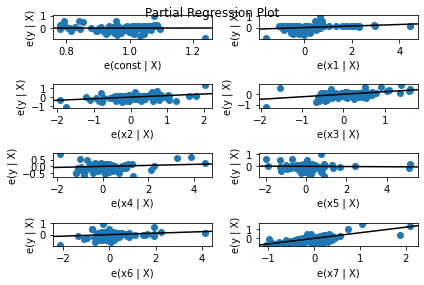

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
 
X_train_off = sm.add_constant(xtrain)
smRegression = sm.OLS(ytrain, X_train_off)
 
model = smRegression.fit()
print(model.summary())

 
ypred = model.predict(X_train_off)
rmse = sm.tools.eval_measures.rmse(ytrain, ypred)
fig = sm.graphics.plot_partregress_grid(model)

 